**ML lab1**

Выполнила: Машрабова Аида

**1. Загрузка данных**

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


In [4]:
test.head()

,ID,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,...,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,1,2006-04-10,28,64653,674,65491,48,Single,2,Own,...,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,2,2013-11-28,41,300000,768,16811,60,Single,1,Own,...,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,...,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,...,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1


**2. EDA**

**2.1.** Общая информация

In [5]:
print(f"Размер train.csv: {train.shape}")
print(f"Размер test.csv: {test.shape}")
print("\ntrain.csv:\n")
print(train.info())
print("\ntest.csv:\n")
print(test.info())

Размер train.csv: (11017, 36)
Размер test.csv: (5000, 36)

train.csv:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInq

В train.csv большинство столбцов имеют тип float64, а также присутствуют столбцы типа object. В test.csv схожая структура, но типы данных отличаются (например, возраст представлен как int64, а не float64).

**2.2.** Анализ и обработка пропущенных данных

In [6]:
print("\nПропущенные значения в train.csv:\n")
print(train.isnull().sum())
print("\nПропущенные значения в test.csv:\n")
print(test.isnull().sum())


Пропущенные значения в train.csv:

ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel     

В train.csv обнаружены пропущенные значения в ряде столбцов, а в test.csv пропуски отсутствуют.


In [7]:
missing_columns = train.columns[train.isnull().any()].tolist()
missing_data = train[missing_columns]
missing_pattern = missing_data.isnull().sum(axis=1).value_counts().sort_index()

print("Распределение количества пропусков в строках:")
print(missing_pattern)

Распределение количества пропусков в строках:
0     9986
9      501
36     530
Name: count, dtype: int64


In [8]:
print("Пропуски в RiskScore:", train['RiskScore'].isnull().sum())

Пропуски в RiskScore: 530


Удаляем 530 строк с пропущенным значением RiskScore, так как целевая переменная обязательна и эти данные не могут быть использованы в процессе предсказания.

In [9]:
train = train.dropna(subset=['RiskScore'])
print(f"Размер данных после удаления пропусков в RiskScore: {train.shape}")
print(f"Оставшиеся пропуски в RiskScore: {train['RiskScore'].isnull().sum()}")

Размер данных после удаления пропусков в RiskScore: (10487, 36)
Оставшиеся пропуски в RiskScore: 0


После удаления строк с RiskScore осталось 501 строка с 9 пропусками в других столбцах. Заполняем пропуски медианами и модами.

In [10]:
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
train[numeric_columns] = train[numeric_columns].fillna(train[numeric_columns].median())
categorical_columns = train.select_dtypes(include='object').columns
for col in categorical_columns:
    mode_val = train[col].mode()[0]
    train[col] = train[col].fillna(mode_val)
print(f"Оставшиеся пропуски после заполнения: {train.isnull().sum().sum()}")

Оставшиеся пропуски после заполнения: 0


**2.3.** Анализ и обработка повторяющихся данных

In [11]:
print("Количество повторов в train.csv до удаления:", train.duplicated().sum())
print("Количество повторов в test.csv:", test.duplicated().sum())

train = train.drop_duplicates()
print(f"\nРазмер данных после удаления повторяющихся данных: {train.shape}")

Количество повторов в train.csv до удаления: 487
Количество повторов в test.csv: 0

Размер данных после удаления повторяющихся данных: (10000, 36)


**2.4.** Приведение типов данных в train.csv и test.csv к согласованным

In [15]:
train['ApplicationDate'] = pd.to_datetime(train['ApplicationDate'])
test['ApplicationDate'] = pd.to_datetime(test['ApplicationDate'])
int_columns = ['Age', 'NumberOfDependents', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory', 'Experience']
train[int_columns] = train[int_columns].astype(int)
test[int_columns] = test[int_columns].astype(int)
categorical_columns = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']
train[categorical_columns] = train[categorical_columns].astype('category')
test[categorical_columns] = test[categorical_columns].astype('category')
print(train.dtypes)
print(test.dtypes)

ApplicationDate               datetime64[ns]
Age                                    int64
AnnualIncome                         float64
CreditScore                          float64
LoanAmount                           float64
LoanDuration                         float64
MaritalStatus                       category
NumberOfDependents                     int64
HomeOwnershipStatus                 category
MonthlyDebtPayments                  float64
CreditCardUtilizationRate            float64
NumberOfOpenCreditLines                int64
NumberOfCreditInquiries                int64
DebtToIncomeRatio                    float64
BankruptcyHistory                      int64
LoanPurpose                         category
PreviousLoanDefaults                   int64
PaymentHistory                       float64
LengthOfCreditHistory                  int64
SavingsAccountBalance                float64
CheckingAccountBalance               float64
TotalAssets                          float64
TotalLiabi

**2.5.** Анализ целевой переменной RiskScore

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

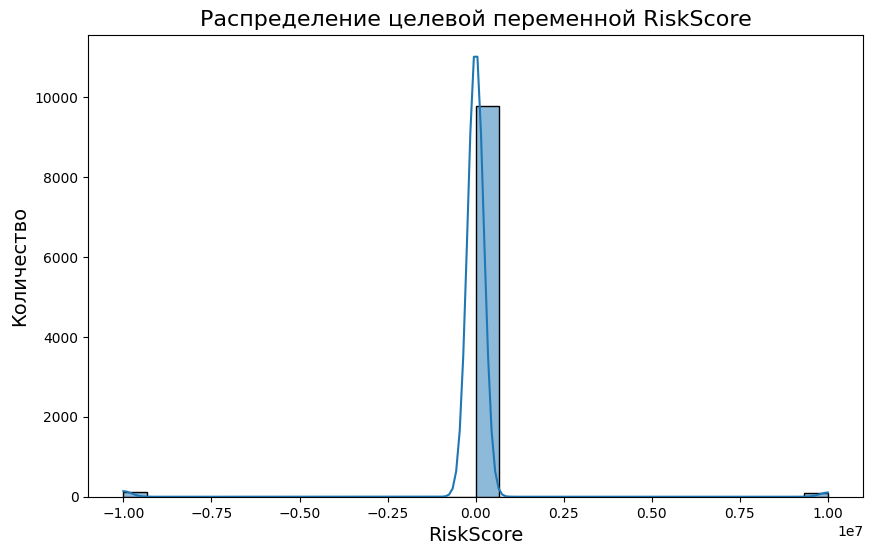

count    1.000000e+04
mean    -2.995269e+04
std      1.455787e+06
min     -9.999999e+06
25%      3.253485e+01
50%      4.409630e+01
75%      6.530486e+01
max      1.000000e+07
Name: RiskScore, dtype: float64


In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(train['RiskScore'], kde=True, bins=30)
plt.title('Распределение целевой переменной RiskScore', fontsize=16)
plt.xlabel('RiskScore', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show()
print(train['RiskScore'].describe())

Очень большие минимальные и максимальные значения (-9,999,999 и 10,000,000 соответственно) говорят о наличии выбросов. Среднее значение сильно отличается от медианы, что также указывает на наличие выбросов. Используем метод межквартильного размаха (IQR) для идентификации выбросов и их удаления (вычисляем первый и третий квартиль, определяем границы для выбросов и удаляем строки, где RiskScore выходит за пределы этих границ).

In [33]:
Q1 = train['RiskScore'].quantile(0.25)
Q3 = train['RiskScore'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_no_outliers = train[(train['RiskScore'] >= lower_bound) & (train['RiskScore'] <= upper_bound)]
print(f"Размер данных после удаления выбросов: {train_no_outliers.shape}")

Размер данных после удаления выбросов: (9788, 36)


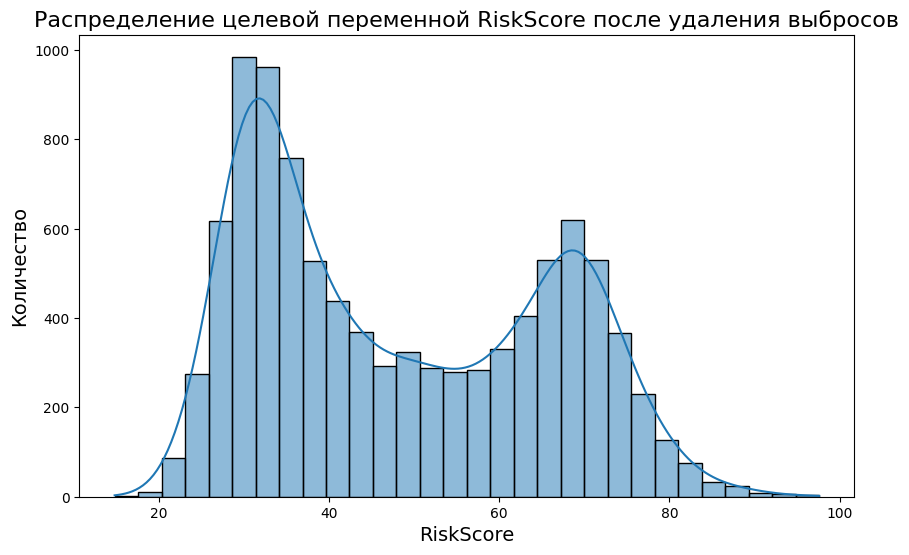

count    9788.000000
mean       48.325333
std        17.233659
min        14.841417
25%        32.717486
50%        44.180868
75%        65.090711
max        97.597249
Name: RiskScore, dtype: float64


In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(train_no_outliers['RiskScore'], kde=True, bins=30)
plt.title('Распределение целевой переменной RiskScore после удаления выбросов', fontsize=16)
plt.xlabel('RiskScore', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show()
print(train_no_outliers['RiskScore'].describe())

Распределение RiskScore приблизилось к нормальному с медианой ~44.18 и средним ~48.33. Минимальное значение 14.84 и максимальное 97.60 показывают, что данные теперь находятся в разумных пределах.

**2.5.** Анализ числовых признаков на выбросы

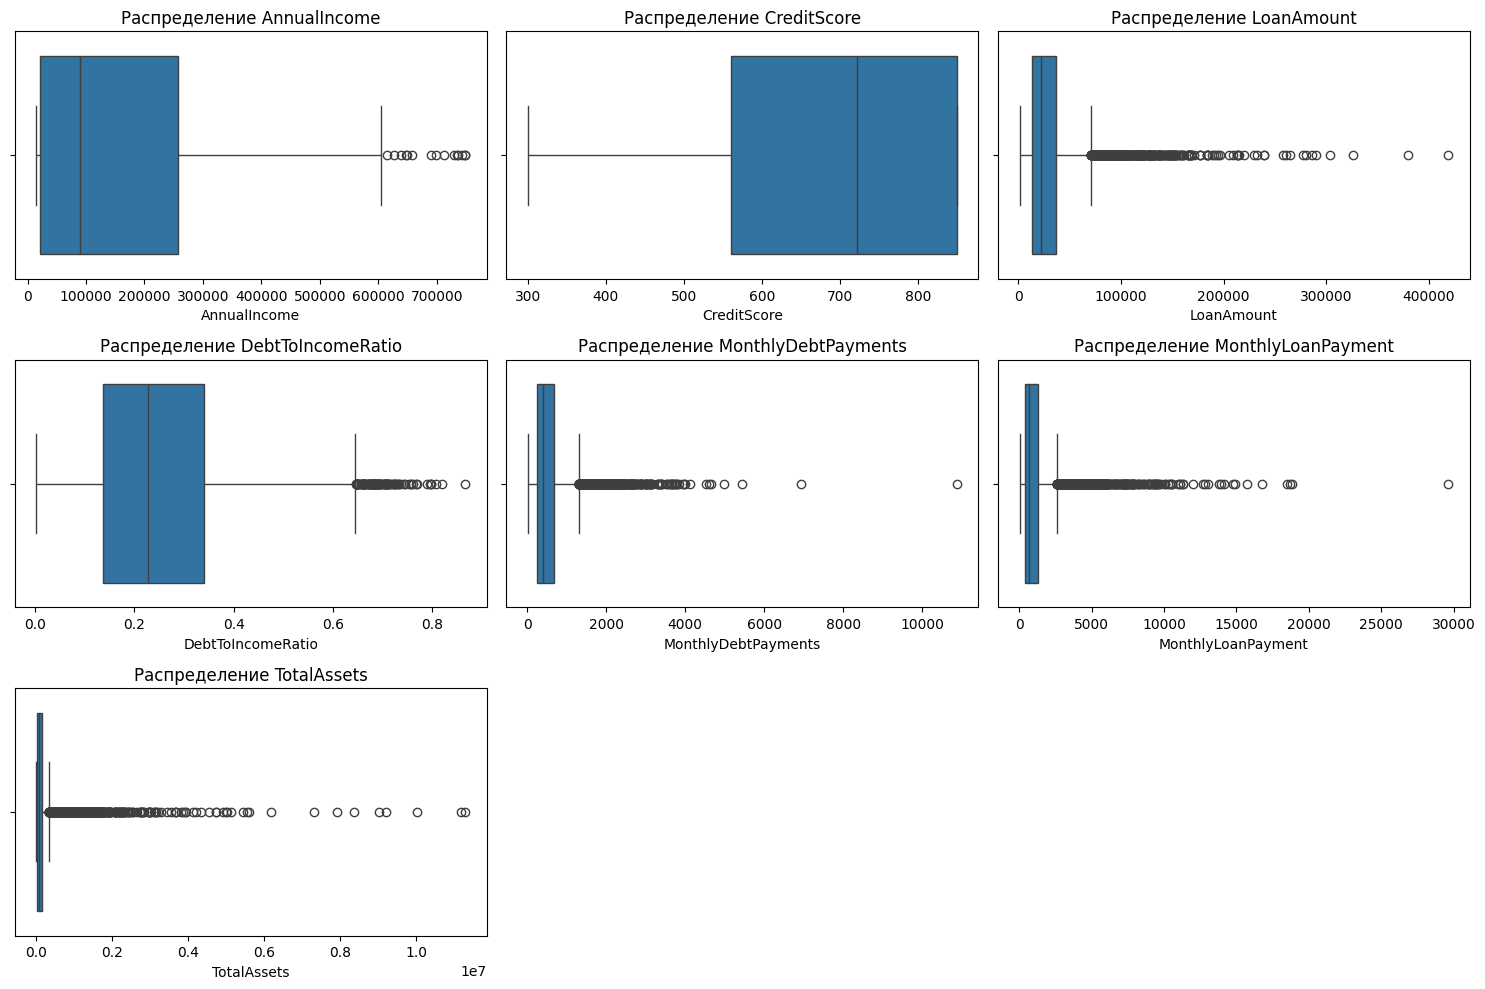

In [31]:
key_numeric = ['AnnualIncome', 'CreditScore', 'LoanAmount', 'DebtToIncomeRatio',
               'MonthlyDebtPayments', 'MonthlyLoanPayment', 'TotalAssets']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_numeric):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=train_no_outliers[col])
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

AnnualIncome: Сильный перекос вправо.

CreditScore: Нет явных выбросов.


LoanAmount: Выбросы искажают распределение.


DebtToIncomeRatio: Проблема в правом хвосте аспределения.


MonthlyDebtPayments: Выбросы нарушают линейность.


TotalAssets: Вкстремальные выбросы.

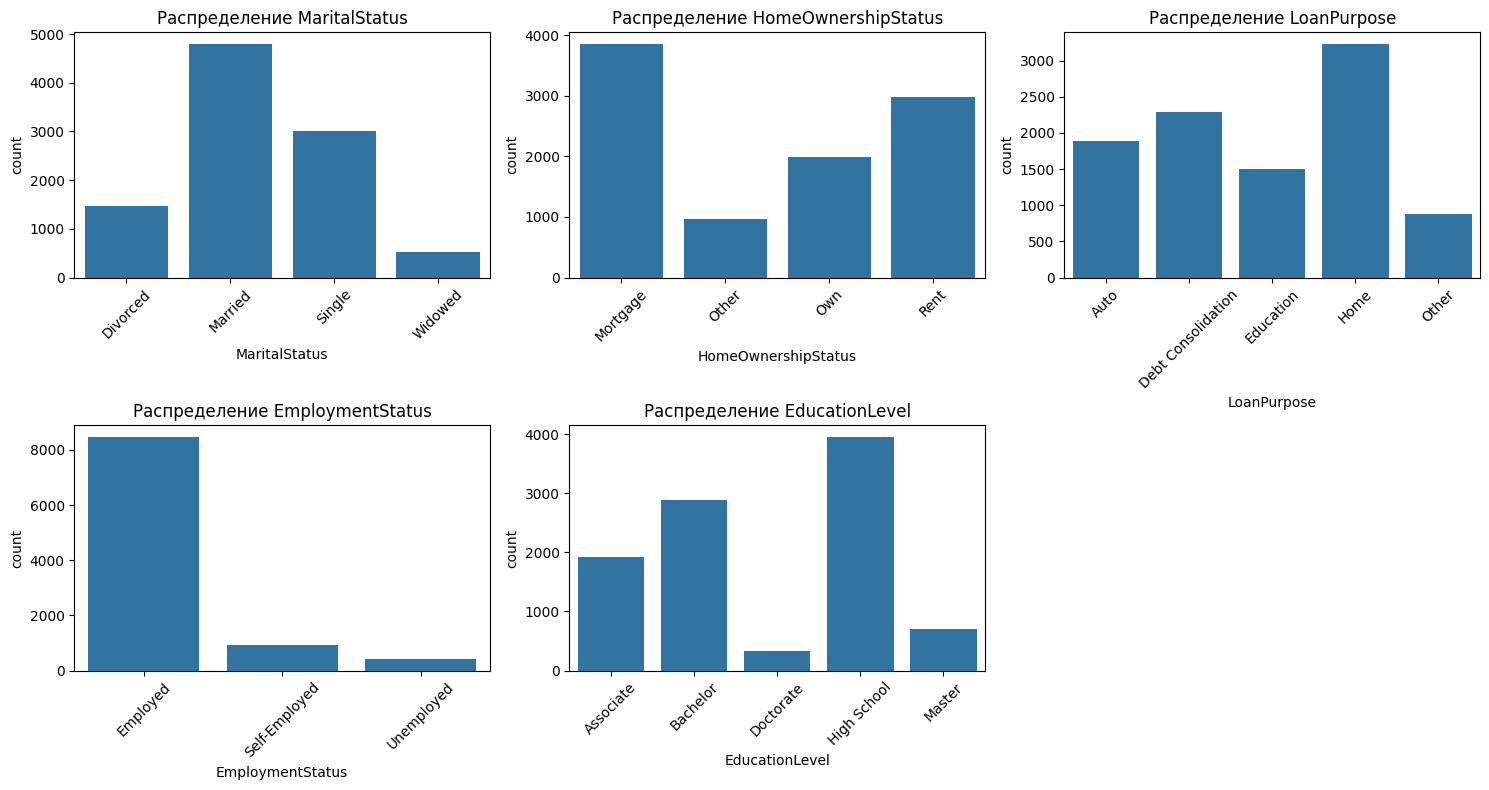

In [32]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=train_no_outliers)
    plt.title(f'Распределение {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  MaritalStatus: Доминируют Married и Single.

  HomeOwnership: Большинство имеют Mortgage или Rent.

  LoanPurpose: Наибольшая частота у категории "Home".

  EmploymentStatus: Наибольшая частота у категории "Employed".

  EducationLevel: Bachelor и High School - основные группы.

**2.6.** Матрица корреляций

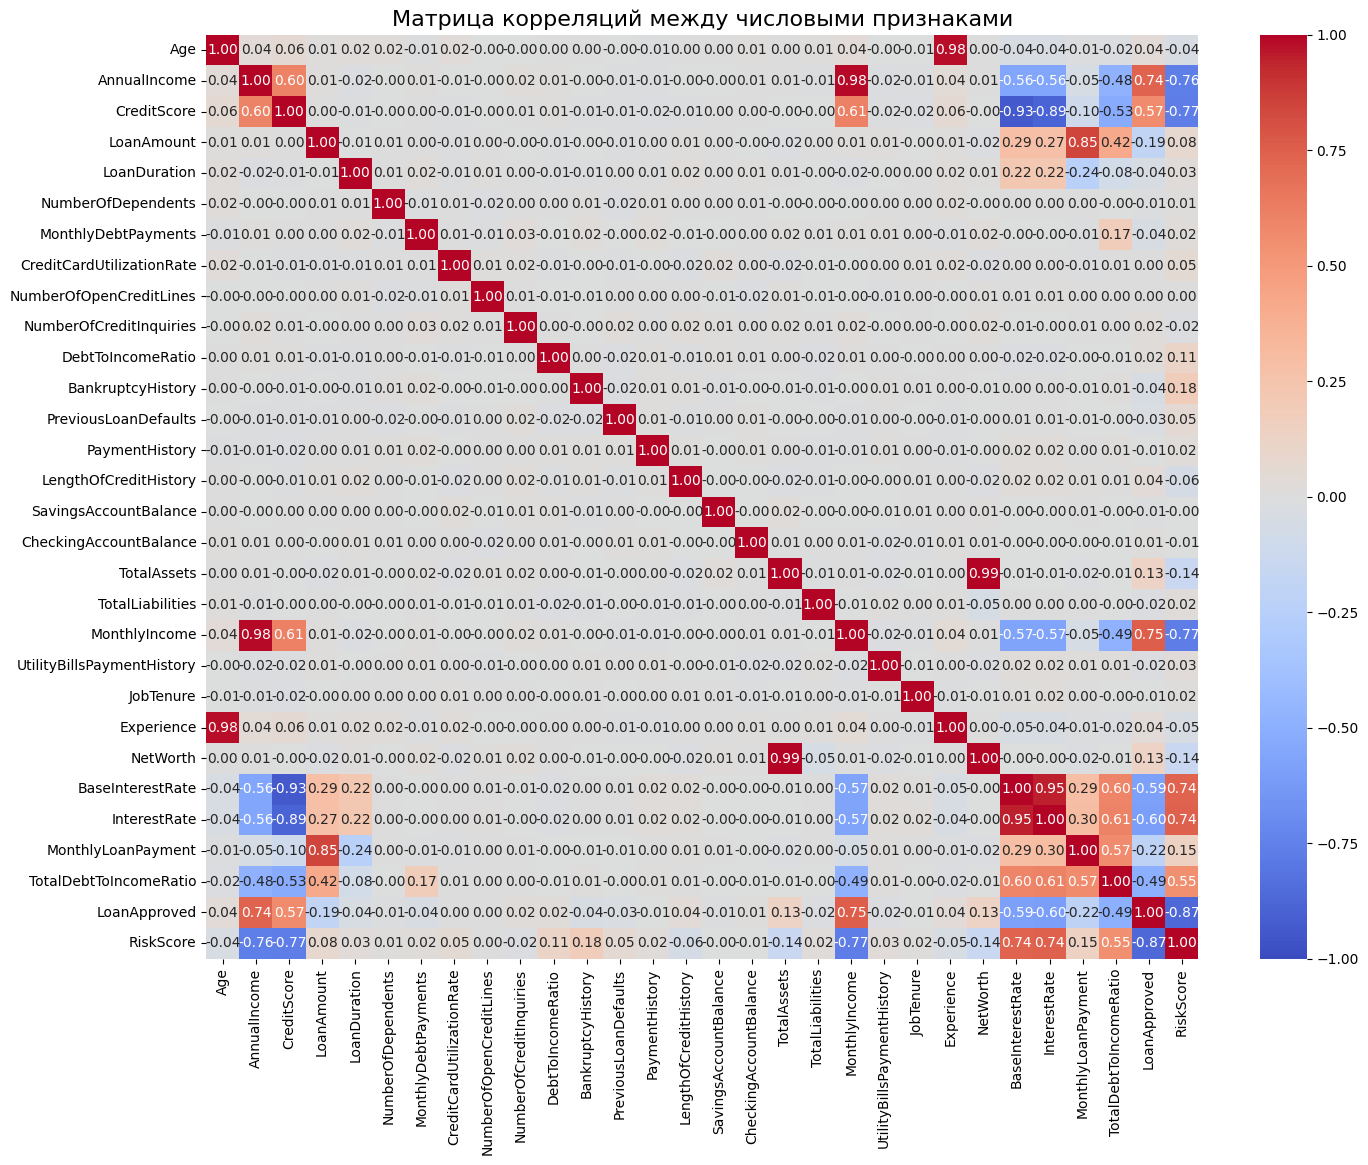

RiskScore                     1.000000
InterestRate                  0.743754
BaseInterestRate              0.741257
TotalDebtToIncomeRatio        0.551314
BankruptcyHistory             0.175162
MonthlyLoanPayment            0.147029
DebtToIncomeRatio             0.110157
LoanAmount                    0.076855
PreviousLoanDefaults          0.054791
CreditCardUtilizationRate     0.053632
LoanDuration                  0.028770
UtilityBillsPaymentHistory    0.025609
TotalLiabilities              0.019167
MonthlyDebtPayments           0.017259
PaymentHistory                0.016511
JobTenure                     0.015130
NumberOfDependents            0.008532
NumberOfOpenCreditLines       0.002193
SavingsAccountBalance        -0.001455
CheckingAccountBalance       -0.007538
NumberOfCreditInquiries      -0.016526
Age                          -0.043591
Experience                   -0.045816
LengthOfCreditHistory        -0.060102
NetWorth                     -0.142801
TotalAssets              

In [39]:
numeric_data = train_no_outliers.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(16, 12))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Матрица корреляций между числовыми признаками", fontsize=16)
plt.show()
correlation_with_target = correlation_matrix['RiskScore'].sort_values(ascending=False)
print(correlation_with_target)


InterestRate, BaseInterestRate и TotalDebtToIncomeRatio имеют высокую положительную связь с RiskScore. LoanApproved, MonthlyIncome, и CreditScore демонстрируют значительную отрицательную корреляцию с RiskScore. Большинство других признаков имеют слабую связь с целевой переменной. Некоторые переменные, такие как NumberOfDependents и SavingsAccountBalance, практически не влияют на RiskScore.


**3. Нормализация данных**